In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [48]:
columns = df.columns

In [49]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [50]:
for col in columns:
  print(col,df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']
math score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score [ 74  88  93  44  75  78  92 

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

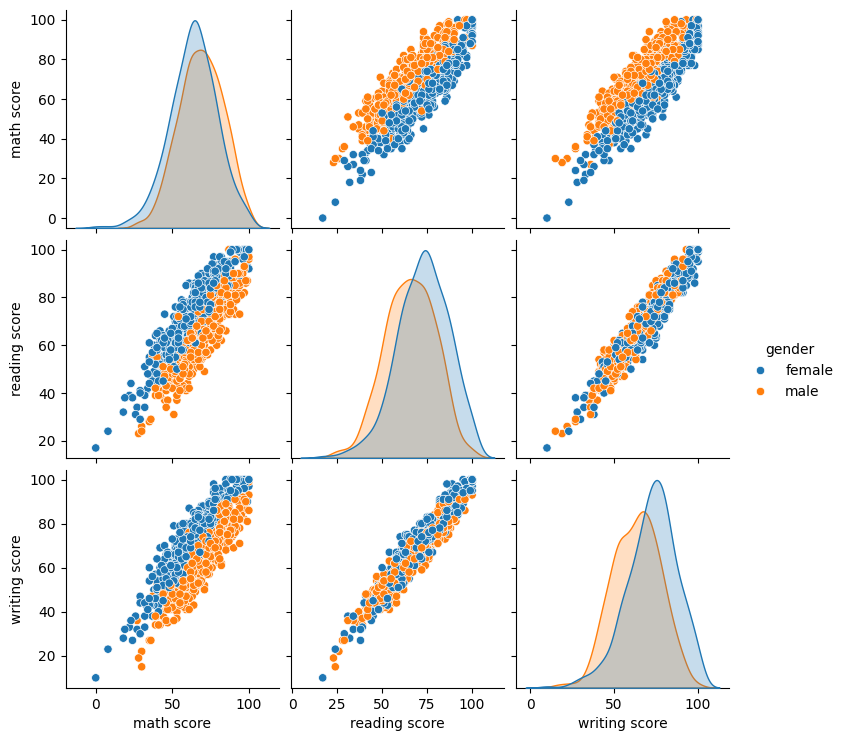

In [52]:
sns.pairplot(df,hue='gender')

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
columns_to_encode = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])

In [56]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


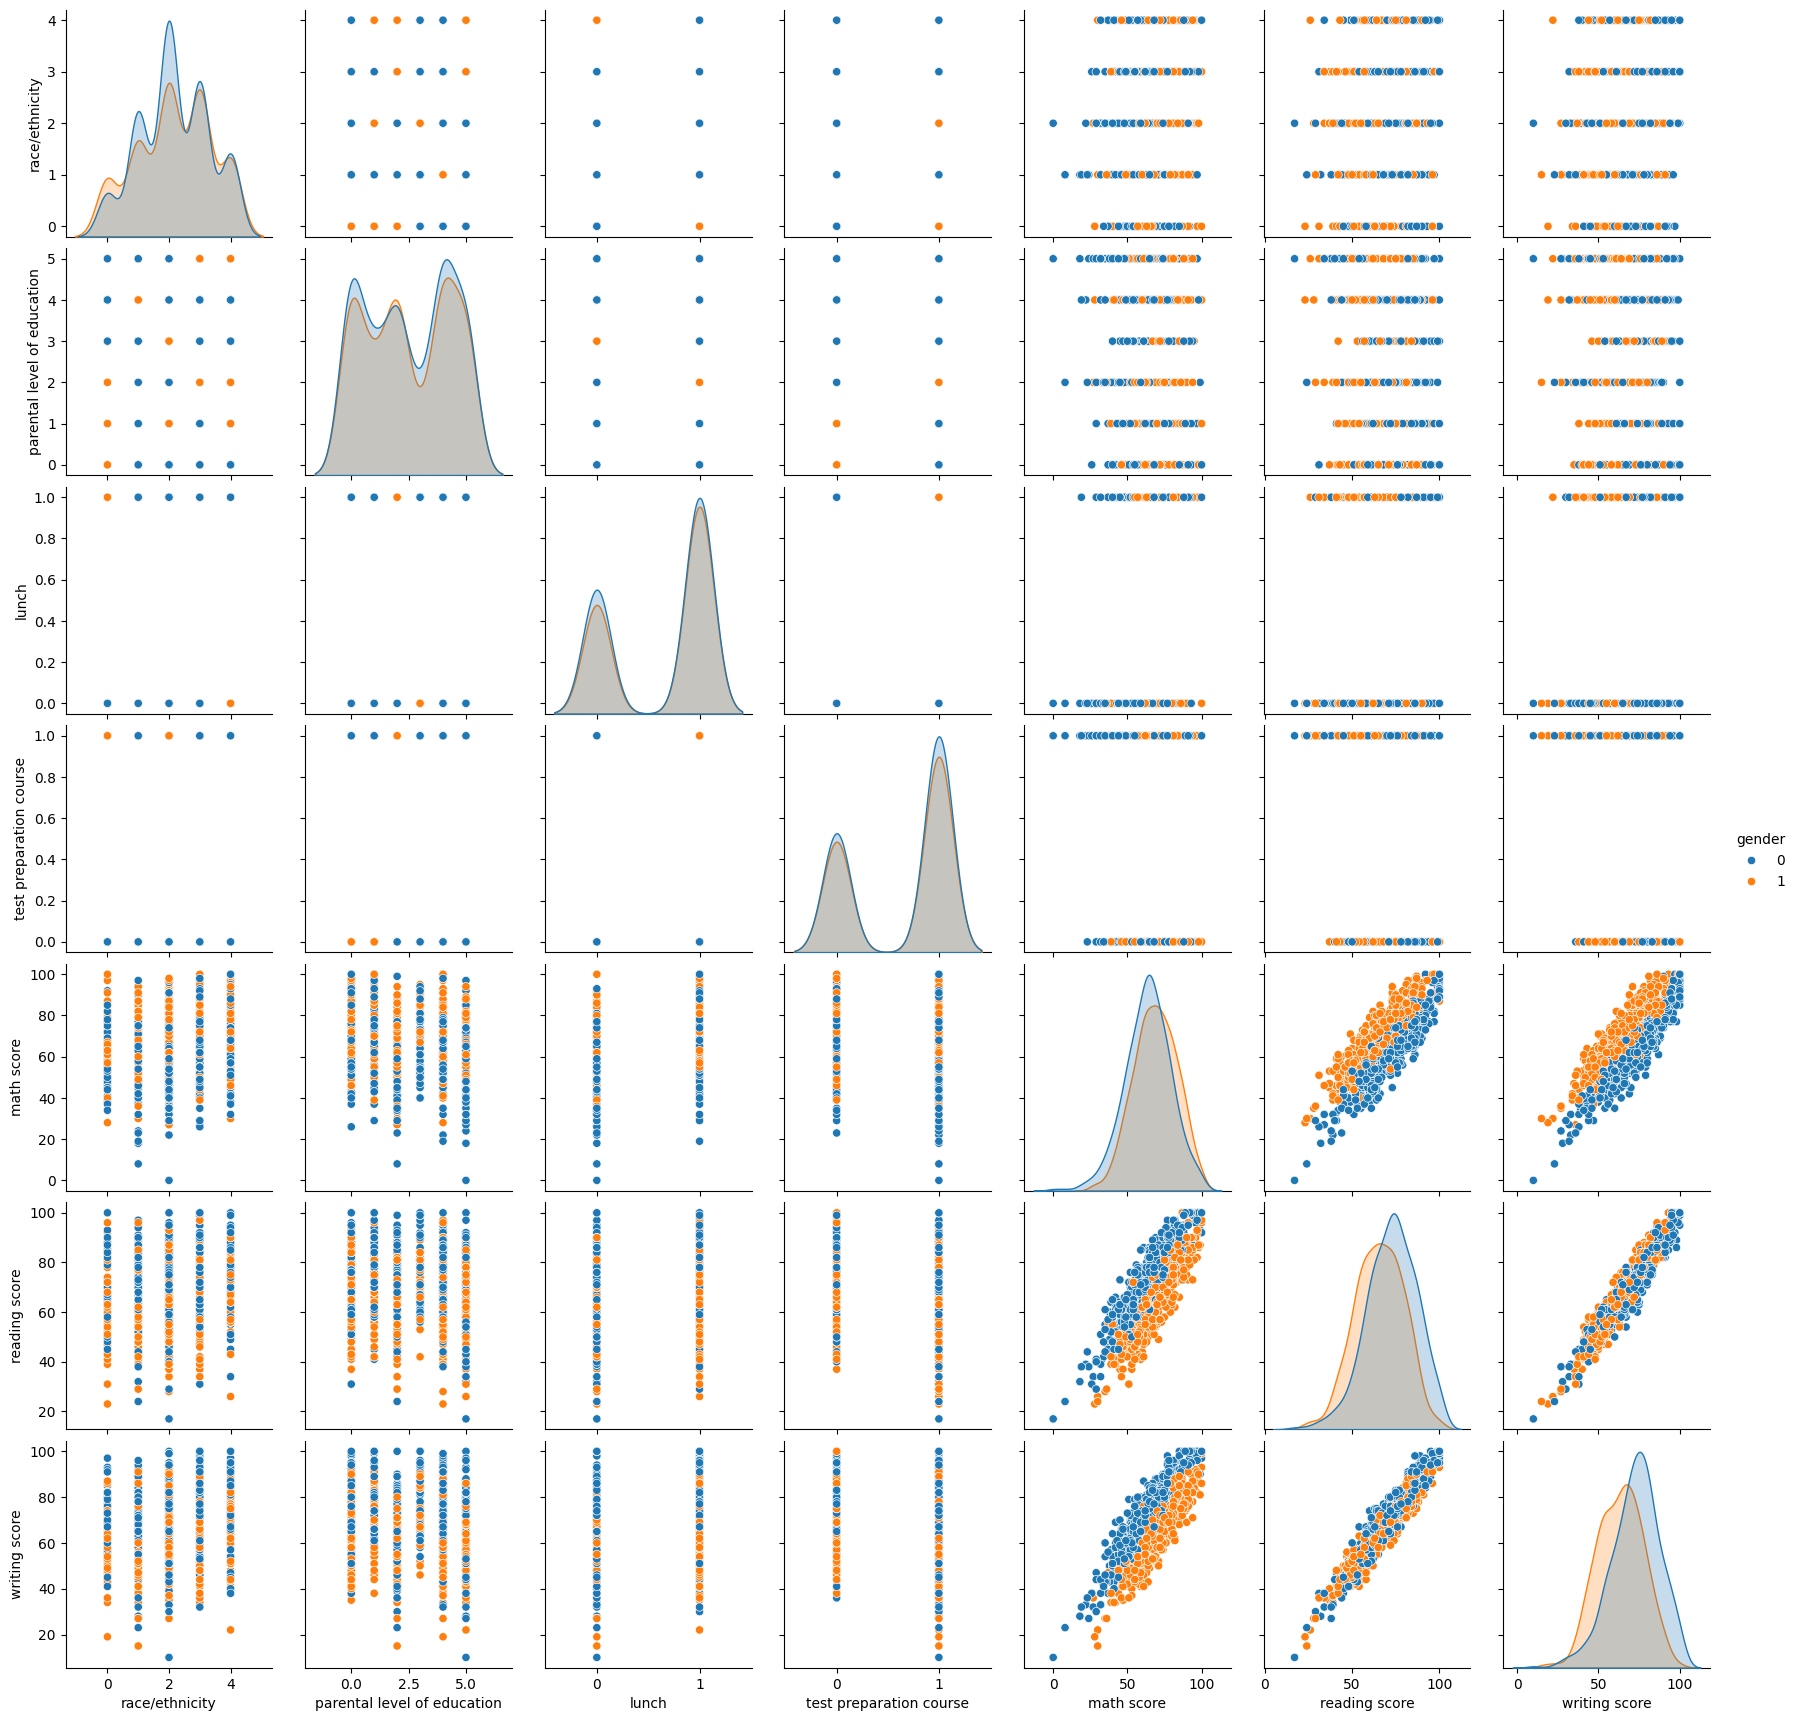

In [57]:
sns.pairplot(df,hue='gender')

In [58]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


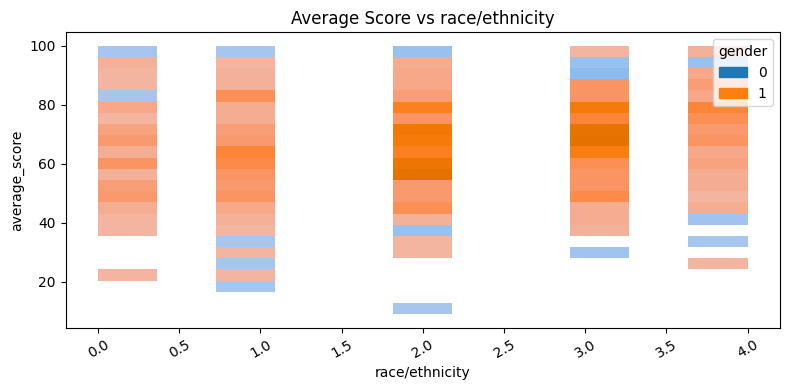

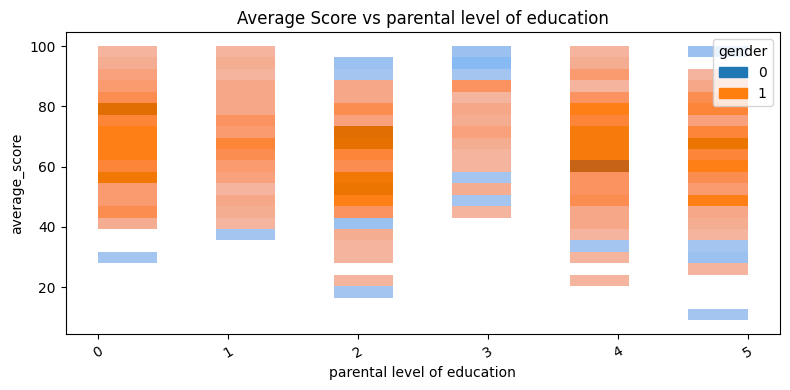

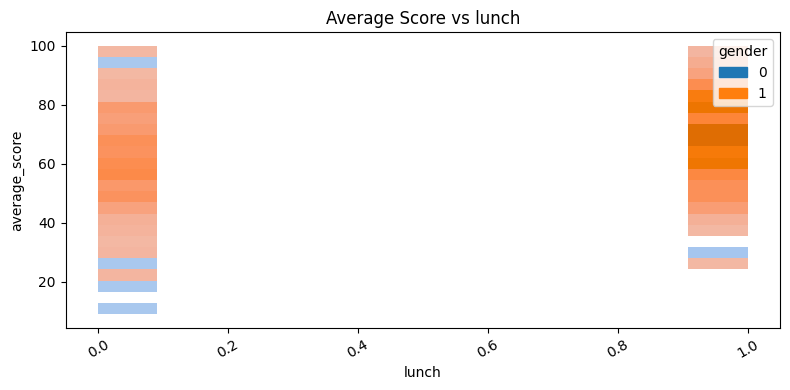

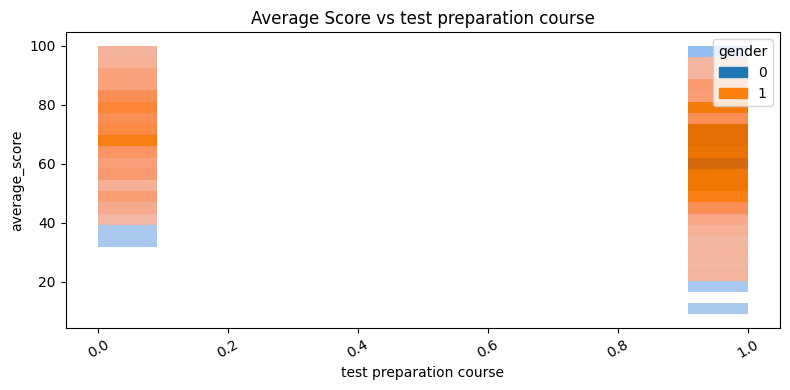

In [60]:
cols = ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for a in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=a, y='average_score', data=df, hue='gender')
    plt.title(f'Average Score vs {a}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    print()
    plt.show()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop(['average_score', 'math score', 'reading score', 'writing score'], axis=1)
y = df['average_score']

In [64]:
y

,average_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [63]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 234.3599446520932
R-squared Score: -0.09326723983276541


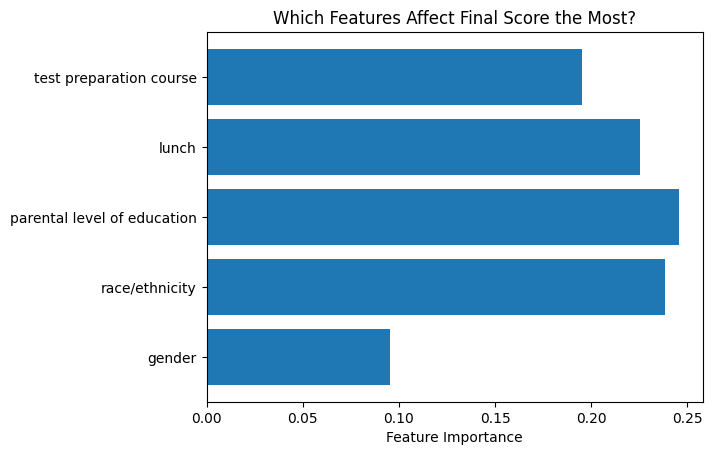

In [68]:
importance = model.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("Which Features Affect Final Score the Most?")
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
dt = DecisionTreeRegressor(random_state =42)

In [71]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [72]:
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5,scoring='neg_mean_squared_error')

In [73]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [76]:
grid.fit(X_train, y_train)
best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [77]:
model2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 232.77684996091665
R-squared Score: -0.08588225104559966


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train models
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Predict
pred_dt = best_dt.predict(X_test)
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_test, y_pred, name):
    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

evaluate(y_test, pred_dt, "Decision Tree")
evaluate(y_test, pred_lr, "Linear Regression")
evaluate(y_test, pred_rf, "Random Forest")



Decision Tree
RMSE: 14.936788937583154
R² Score: -0.04077640107392266

Linear Regression
RMSE: 13.691222853433064
R² Score: 0.1255652122569746

Random Forest
RMSE: 14.849208401991024
R² Score: -0.028607182521283248
